In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures

In [59]:
df = pd.read_csv('D:\Programming\AI\Jadi\Practice\Polynomial_Regression\Weight-Height Polynomial Dataset.csv')
df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


In [60]:
cdf = df[['Weight', 'Height']]
msk = np.random.rand(len(cdf)) > 0.8
train = cdf[~msk]
test = cdf[msk]

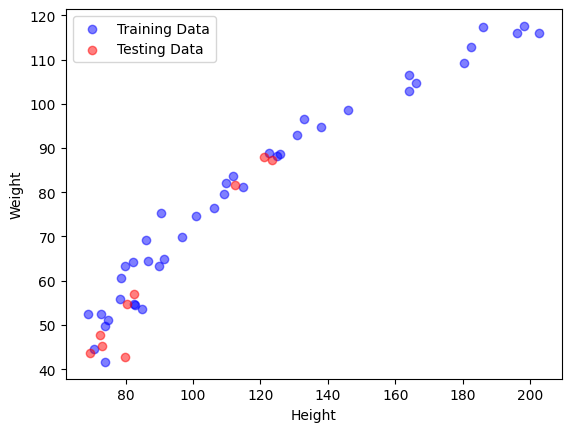

In [61]:
plt.scatter(train['Height'], train['Weight'], color='blue', alpha=0.5, label = 'Training Data')
plt.scatter(test['Height'], test['Weight'], color='red', alpha=0.5, label = 'Testing Data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [62]:
train_x = np.asanyarray(train['Height'])
train_y = np.asanyarray(train['Weight'])
test_x = np.asanyarray(test['Height'])
test_y = np.asanyarray(test['Weight'])

In [63]:
train_x = train_x.reshape(-1, 1)
root_transformer = FunctionTransformer(np.sqrt)
model = make_pipeline(root_transformer, LinearRegression())
model.fit(train_x, train_y)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('linearregression', LinearRegression())])

In [64]:
test_x = test_x.reshape(-1,1)
y_pred = model.predict(test_x)
x = np.asanyarray(cdf['Height'])
x = x.reshape(-1, 1)
y = model.predict(x)

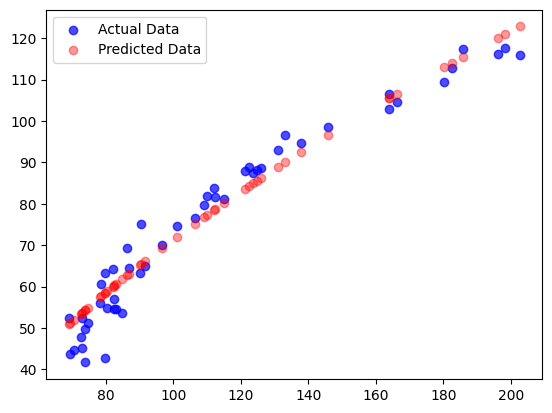

In [65]:
plt.scatter(cdf['Height'], cdf['Weight'], color='blue', alpha=0.7, label = 'Actual Data')
plt.scatter(x, y, color='red', alpha=0.4, label = 'Predicted Data')
plt.legend()
plt.show()

In [66]:
score = r2_score(y_pred, test_y)
score_r = np.round(score, 2)
print(score_r)

0.69
